### Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### Data Collection and Processing

In [2]:
df=pd.read_csv('loan_data_set1.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


### Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

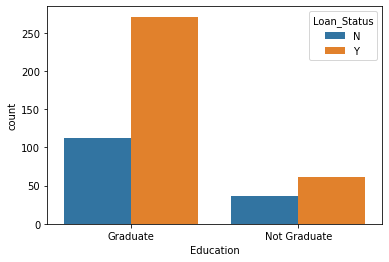

In [11]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

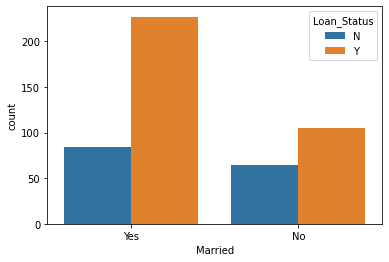

In [12]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

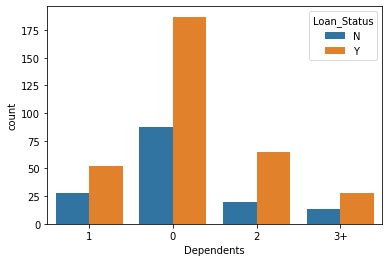

In [13]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

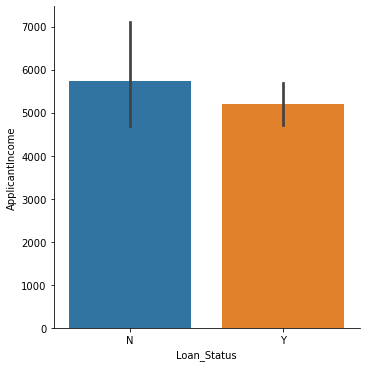

In [14]:
sns.catplot(x='Loan_Status',y='ApplicantIncome',kind='bar',data=df)

In [15]:
df['Dependents']=df['Dependents'].replace({'3+':int(3)})
df['Dependents']=df['Dependents'].replace({'1':int(1)})
df['Dependents']=df['Dependents'].replace({'2':int(2)})
df['Dependents']=df['Dependents'].replace({'0':int(0)})

In [16]:
df.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])  
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [18]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

#### GENDER          -> Male:1  Female:0
#### MARRIAGE STATUS ->Married:1 Unmarried:0
#### EDUCATION       ->Graduate:1 Notgraduate:0
#### PROPERTY AREA   ->Urban:2 Semiurban:1 Rural:0
#### LOAN STATUS     ->Yes:1 No:0

In [19]:
df.reset_index(inplace=True)
df

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [20]:
df.drop('index',axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


<AxesSubplot:>

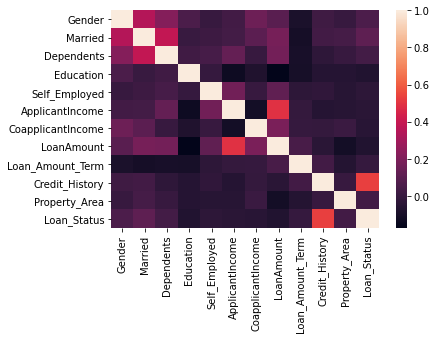

In [21]:
sns.heatmap(df.corr(),fmt='.2g')

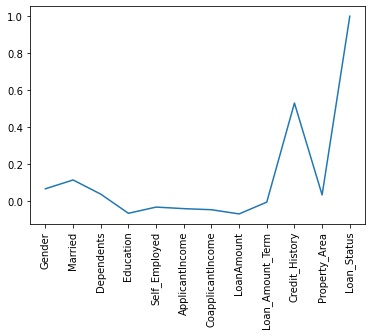

In [22]:
corr=df[df.columns].corr()['Loan_Status']
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [23]:
# separating the data and label
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

### Train Test Split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (384, 11) (96, 11)


### Training the model: Logstic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_predicted=model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
print("Accuracy_score:",(accuracy_score(y_test,y_predicted)*100),"%")

Accuracy_score: 76.04166666666666 %


In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [59]:
y_predicteds=rfc.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score
print("Accuracy_score:",(accuracy_score(y_test,y_predicteds)*100),"%")

Accuracy_score: 76.04166666666666 %


In [61]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [62]:
y_predicteddd=dt.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
print("Accuracy_score:",(accuracy_score(y_test,y_predicteddd)*100),"%")

Accuracy_score: 65.625 %


In [64]:
y_predicted=model.predict(x_test)

Text(0.5, 1.0, 'Accuracy Score:76.04166666666666')

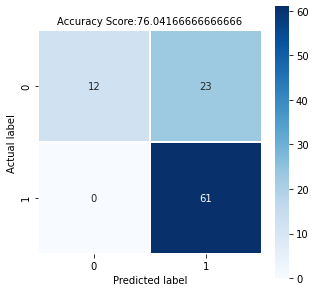

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score:{0}'.format(model.score(x_test,y_test)*100)
plt.title(all_sample_title,size=10)

In [71]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

In [72]:
y_predicted=model.predict(x_test)

In [ ]:
import tkinter as tk
from tkinter import ttk
from sklearn.linear_model import LogisticRegression

def calculate():
            # Get the user input values from the textboxes
    Gender  = float(Gender_input.get())
    Married  = float(Married_input.get())
    Dependents = float(Dependents_input.get())
    Education = float(Education_input.get())
    Self_Employed  = float(Self_Employed_input.get())
    ApplicantIncome  = float(ApplicantIncome_input.get())
    CoapplicantIncome  = float(CoapplicantIncome_input.get())
    LoanAmount  = float(LoanAmount_input.get())
    Loan_Amount_Term  = float(Loan_Amount_Term_input.get())
    Credit_History  = float(Credit_History_input.get())
    Property_Area  = float(Property_Area_input.get())


    model=LogisticRegression()
    model.fit(x_train,y_train)
    
    loan_Status=model.predict([[Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,
                               Loan_Amount_Term,Credit_History,Property_Area]])
    
    if loan_Status[0] == 1:
        result_label.config(text="\n Congratulations: The Loan is approved for you!!")
    else:
        result_label.config(text="\n Sorry: The Loan is not approved for you")   
        
root = tk.Tk()

root.title("LOAN APPROVAL PREDCTON")

Gender_label = tk.Label(root,width=15,text="Enter Gender:", font=('Arial', 13) )
Gender_label.pack()
Gender_input = tk.Entry(root,width=15, font=('Arial', 10))
Gender_input.pack()

Married_label = tk.Label(root, text="Enter Married:", font=('Arial', 13),padx=5,pady=5)
Married_label.pack()
Married_input = tk.Entry(root)
Married_input.pack()

Dependents_label = tk.Label(root, text="Enter Dependents:", font=('Arial', 13),padx=5,pady=5)
Dependents_label.pack()
Dependents_input = tk.Entry(root)
Dependents_input.pack()

Education_label = tk.Label(root, text="Enter Education:", font=('Arial', 13),padx=5,pady=5)
Education_label.pack()
Education_input = tk.Entry(root)
Education_input.pack()

Self_Employed_label = tk.Label(root, text="Enter Self_Employed:", font=('Arial', 13),padx=5,pady=5)
Self_Employed_label.pack()
Self_Employed_input = tk.Entry(root)
Self_Employed_input.pack()

ApplicantIncome_label = tk.Label(root, text="Enter  ApplicantIncome:", font=('Arial', 13),padx=5,pady=5)
ApplicantIncome_label.pack()
ApplicantIncome_input = tk.Entry(root)
ApplicantIncome_input.pack()

CoapplicantIncome_label = tk.Label(root, text="Enter CoapplicantIncom:", font=('Arial', 13),padx=5,pady=5)
CoapplicantIncome_label.pack()
CoapplicantIncome_input = tk.Entry(root)
CoapplicantIncome_input.pack()

LoanAmount_label = tk.Label(root, text="Enter LoanAmount:", font=('Arial', 13),padx=5,pady=5)
LoanAmount_label.pack()
LoanAmount_input = tk.Entry(root)
LoanAmount_input.pack()

Loan_Amount_Term_label = tk.Label(root, text="Enter Loan_Amount_Term:", font=('Arial', 13),padx=5,pady=5)
Loan_Amount_Term_label.pack()
Loan_Amount_Term_input = tk.Entry(root)
Loan_Amount_Term_input.pack()

Credit_History_label = tk.Label(root, text="Enter  Credit_History:", font=('Arial', 13),padx=5,pady=5)
Credit_History_label.pack()
Credit_History_input = tk.Entry(root)
Credit_History_input.pack()

Property_Area_label = tk.Label(root, text="Enter  Property_Area:", font=('Arial', 13),padx=5,pady=5)
Property_Area_label.pack()
Property_Area_input= tk.Entry(root)
Property_Area_input.pack()

separator = ttk.Separator(root, orient='horizontal')
separator.pack(fill='x', pady=10)


calculate_button = tk.Button(root, text="Calculate", command=calculate,font=('Bold', 13),  width=10, padx=25, pady=5 ,fg ='red')
calculate_button.pack()

result_label = tk.Label(root, text="",font=('Bold', 13))
result_label.config(bg='lightgreen')
result_label.pack()

# Run the main loop
root.mainloop()

    

In [69]:
values=[0]*x.shape[1]
np.array(values)
data=np.array(x.columns)
values


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [70]:
for i in range(0, x.shape[1]):
    values[i]=int(input(print(f'Enter the value for',data[i] )))
values=np.reshape(values,[1,11])
customer= pd.DataFrame(values, index=range(1), columns=x.columns)
loan_Status=model.predict(customer)
if loan_Status[0]==1:
    print('\n\n Congratulations: The Loan is approved for you')
else:
    print('\n\n Sorry: The Loan is not approved for you')

Enter the value for Gender
None1
Enter the value for Married
None1
Enter the value for Dependents
None1
Enter the value for Education
None0
Enter the value for Self_Employed
None1
Enter the value for ApplicantIncome
None500
Enter the value for CoapplicantIncome
None00
Enter the value for LoanAmount
None2000
Enter the value for Loan_Amount_Term
None1
Enter the value for Credit_History
None1
Enter the value for Property_Area
None1


 Sorry: The Loan is not approved for you
